## Unveiling iPhone Purchase Predictions: A Journey with K-Nearest Neighbors (KNN) Classifier

**Introduction:**<br>

The world of technology is constantly evolving, and purchasing decisions, especially for high-end gadgets like iPhones, can be influenced by various factors. In this blog, we'll explore the use of the K-Nearest Neighbors (KNN) classifier to predict whether an individual is likely to purchase an iPhone based on their gender, age, and salary. Join us on this journey as we delve into the realms of data science to unravel the patterns behind iPhone purchases.

In [1]:
# import required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dadabase
df = pd.read_csv("Iphonerecords.csv")

In [4]:
# Display first 5 rows of database
df.head(5)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


**Data Preprocessing:**<br>
Clean and preprocess the data to handle any missing values, normalize features, and convert categorical variables like gender into a format suitable for the KNN algorithm.

In [5]:
# Detect missing values
df.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [6]:
# Return a Series containing counts of unique values coloumn.
df['Purchase Iphone'].value_counts()

0    257
1    143
Name: Purchase Iphone, dtype: int64

In [7]:
257/400

0.6425

In [8]:
143/400

0.3575

**Training the KNN Model:**<br>
Divide the dataset into training and testing sets. Train the KNN classifier using the input features (gender, age, and salary) to predict whether an individual is likely to purchase an iPhone or not.

In [9]:
# import train_test_split library
from sklearn.model_selection import train_test_split

# Define input and output features
X = df.drop('Purchase Iphone',axis=1)
y = df['Purchase Iphone']

In [10]:
# input feature
X

,Gender,Age,Salary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [11]:
# output feature or teaget column
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [12]:
# Classify the categorical and continuous data
def catconsep(df):
    cat=[]
    con=[]
    for i in df.columns:
        if(df[i].dtype =='object'):
            cat.append(i)
        else:
            con.append(i)
    return cat, con

In [13]:
cat, con = catconsep(X)

In [14]:
cat

['Gender']

In [15]:
con

['Age', 'Salary']

In [16]:
# Function to replace the missing values
def replacer(df):
    cat1 , con1 = catconsep(df)
    for i in con1:
        x = df[i].mean()
        df[i]= df[i].fillna(x)
        
    for i in cat1:
        x = df[i].mode()
        df[i]= df[i].fillna(x)
        

In [17]:
# function to normalise the dataset
def standardize(df):
    import pandas as pd
    cat, con = catconsep(df)
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    x1 = pd.DataFrame(ss.fit_transform(df[con]), columns = con)
    return x1


In [18]:
def preprocessing(df):
    cat, con = catconsep(df)
    x1 = standardize(df)
    import pandas as pd
    x2 = pd.get_dummies(df[cat])
    Xnew = x1.join(x2)
    return Xnew

In [19]:

Xnew = preprocessing(X)

In [20]:
Xnew 

,Age,Salary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,0,1
1,-0.253587,-1.460681,0,1
2,-1.113206,-0.785290,1,0
3,-1.017692,-0.374182,1,0
4,-1.781797,0.183751,0,1
...,...,...,...,...
395,0.797057,-0.844019,1,0
396,1.274623,-1.372587,0,1
397,1.179110,-1.460681,1,0
398,-0.158074,-1.078938,0,1


In [21]:
Xnew = Xnew.drop('Gender_Female', axis=1)

In [22]:
Xnew

,Age,Salary,Gender_Male
0,-1.781797,-1.490046,1
1,-0.253587,-1.460681,1
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,1
...,...,...,...
395,0.797057,-0.844019,0
396,1.274623,-1.372587,1
397,1.179110,-1.460681,0
398,-0.158074,-1.078938,1


In [36]:
# import train_test_split library for new normalised dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew, y, test_size=0.2, random_state=31)

In [37]:
xtrain.shape

(320, 3)

In [38]:
ytrain.shape

(320,)

In [39]:
ytest.shape

(80,)

In [27]:
xtest.shape

(80, 3)

### Benefits of Using KNN for iPhone Purchase Predictions:
**Flexibility:**<br>
KNN is a versatile algorithm that can adapt to various types of datasets, making it suitable for predicting iPhone purchases based on diverse individual characteristics.<br>

**Intuitive Interpretation:**<br>
The simplicity of the KNN model allows for easy interpretation of results, making it accessible to individuals without an extensive background in data science.<br>

**Real-world Applicability:**<br>
Predicting iPhone purchase behavior can have practical applications for businesses, enabling them to tailor marketing strategies to specific demographics.<br>

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [29]:
knn.score(xtest,ytest)

0.9

**Predictions and Evaluation:**<Br>
Apply the trained KNN model to new data to predict iPhone purchase decisions. Evaluate the model's performance using metrics such as accuracy, precision, and recall to ensure its effectiveness.

In [30]:
y_pred = knn.predict(xtest)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(ytest, y_pred)

array([[50,  5],
       [ 3, 22]], dtype=int64)

In [32]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.81      0.88      0.85        25

    accuracy                           0.90        80
   macro avg       0.88      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [33]:
total = []
for i in range(2,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    score = knn.score(xtest,ytest)
    total.append(score)

In [34]:
total

[0.8625,
 0.875,
 0.8875,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.875,
 0.8875,
 0.875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.875]

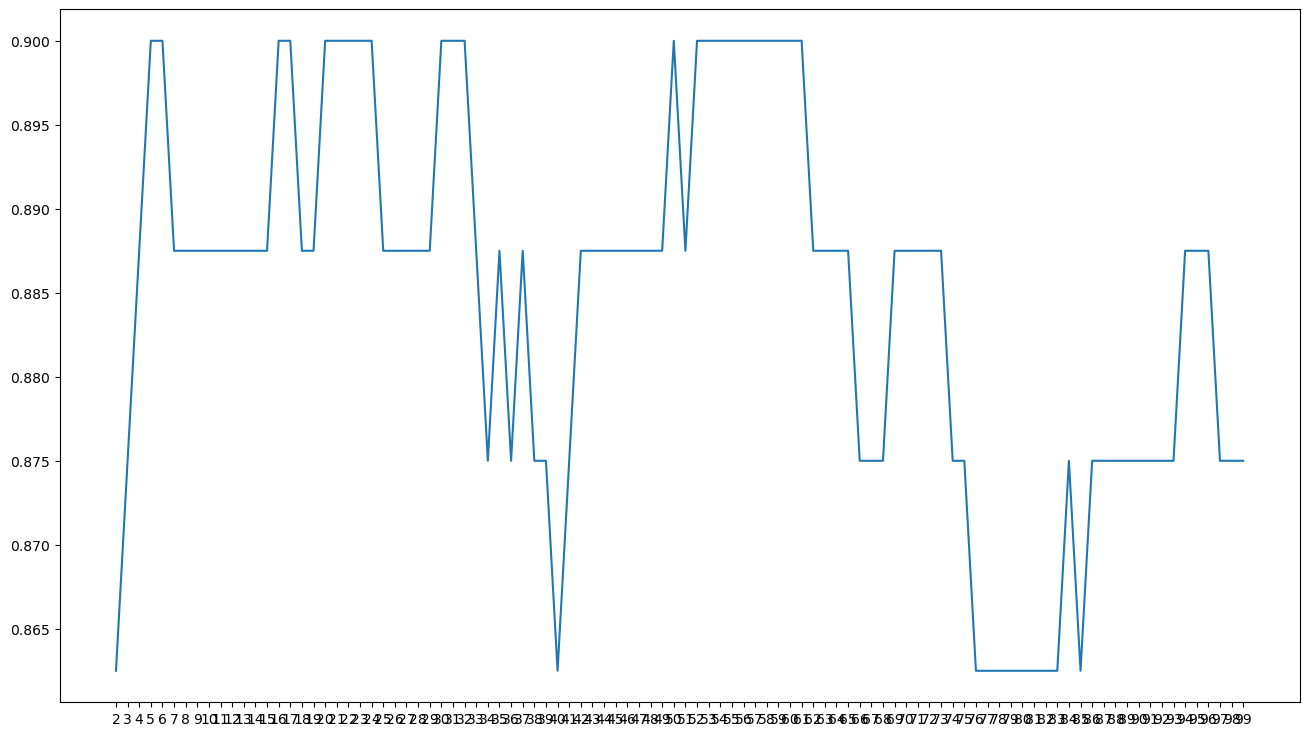

In [35]:
plt.figure(figsize=(16,9))
plt.plot(range(2,100), total)
plt.xticks(range(2,100))
plt.show()

**Conclusion:**<br>
The application of the K-Nearest Neighbors algorithm to predict iPhone purchase decisions based on gender, age, and salary is an exciting venture into the intersection of technology and data science. As we *unravel the patterns and relationships* within the dataset, we gain valuable insights that can inform marketing strategies and enhance the understanding of consumer behavior. The journey into predictive analytics using KNN opens doors to a new era of *personalized marketing and decision-making,* showcasing the transformative power of data in shaping the future of consumer technology.